#### Analysis Questions:
* Are Addiction levels higher in certain locations
* Is there a relationship between profession and device type
* Is there a relationship between scroll rate and engagement level
* Does the type of device impact productivity loss


In [ ]:
# Import Dependencies
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem
import scipy.stats as stats
import seaborn as sns
import os
from pathlib import Path
import requests
import json
import kagglehub

kagglehub.login()

Kaggle credentials set.
Kaggle credentials successfully validated.


In [3]:
# Download latest version
path = kagglehub.dataset_download("muhammadroshaanriaz/time-wasters-on-social-media")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\theli\.cache\kagglehub\datasets\muhammadroshaanriaz\time-wasters-on-social-media\versions\1


In [4]:
# Set the csv file path to load
file_to_load = Path("/Users/theli/.cache/kagglehub/datasets/muhammadroshaanriaz/time-wasters-on-social-media/versions/1/Time-Wasters on Social Media.csv")

#Read data
mobile_usage_df = pd.read_csv(file_to_load)
mobile_usage_df

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,22,Male,India,74254,True,True,Students,Rural,TikTok,...,9,1,Procrastination,Smartphone,iOS,5:45 PM,10,0,At work,Mobile Data
996,997,40,Female,Pakistan,27006,False,False,Waiting staff,Urban,Facebook,...,8,2,Boredom,Smartphone,MacOS,10:15 PM,10,0,At home,Mobile Data
997,998,27,Male,India,94218,True,True,Waiting staff,Rural,TikTok,...,9,1,Procrastination,Smartphone,iOS,10:15 PM,10,0,Commuting,Mobile Data
998,999,61,Male,Pakistan,85344,True,False,Students,Urban,YouTube,...,3,7,Procrastination,Smartphone,MacOS,10:15 PM,5,5,At work,Wi-Fi


In [5]:
# Get info about total rows and columns
num_rows, num_columns = mobile_usage_df.shape

print(f"Total number of rows is: {num_rows}")
print(f"Total number of columns is: {num_columns}")



Total number of rows is: 1000
Total number of columns is: 31


#### Clean the Data

In [6]:
# Get info about data
mobile_usage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   UserID                    1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   object
 3   Location                  1000 non-null   object
 4   Income                    1000 non-null   int64 
 5   Debt                      1000 non-null   bool  
 6   Owns Property             1000 non-null   bool  
 7   Profession                1000 non-null   object
 8   Demographics              1000 non-null   object
 9   Platform                  1000 non-null   object
 10  Total Time Spent          1000 non-null   int64 
 11  Number of Sessions        1000 non-null   int64 
 12  Video ID                  1000 non-null   int64 
 13  Video Category            1000 non-null   object
 14  Video Length             

In [7]:
# Check for any null values
mobile_usage_df.isna().sum()

UserID                      0
Age                         0
Gender                      0
Location                    0
Income                      0
Debt                        0
Owns Property               0
Profession                  0
Demographics                0
Platform                    0
Total Time Spent            0
Number of Sessions          0
Video ID                    0
Video Category              0
Video Length                0
Engagement                  0
Importance Score            0
Time Spent On Video         0
Number of Videos Watched    0
Scroll Rate                 0
Frequency                   0
ProductivityLoss            0
Satisfaction                0
Watch Reason                0
DeviceType                  0
OS                          0
Watch Time                  0
Self Control                0
Addiction Level             0
CurrentActivity             0
ConnectionType              0
dtype: int64

In [8]:
# Check for any duplicates
mobile_usage_df[mobile_usage_df.duplicated()]

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType


In [9]:
# Fetch random rows
mobile_usage_df.sample(5)

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
867,868,53,Other,Germany,38971,False,True,Waiting staff,Rural,Instagram,...,6,4,Entertainment,Computer,Android,2:00 PM,8,2,At work,Mobile Data
872,873,64,Female,United States,74120,True,False,Students,Rural,YouTube,...,9,1,Habit,Tablet,MacOS,5:00 PM,10,0,At home,Wi-Fi
34,35,64,Female,Vietnam,39675,False,True,Students,Rural,TikTok,...,6,4,Entertainment,Tablet,iOS,2:00 PM,8,2,At school,Mobile Data
549,550,49,Male,United States,88803,True,True,Cashier,Urban,Facebook,...,3,7,Habit,Smartphone,Windows,11:30 PM,5,5,At home,Wi-Fi
398,399,49,Other,Vietnam,62752,True,True,Waiting staff,Rural,Facebook,...,8,2,Habit,Computer,iOS,9:15 AM,10,0,At home,Wi-Fi


In [10]:
mobile_usage_df.to_csv("Cleaned_dataset.csv")

In [11]:
#rename Barzil to Brazil in Location column and replace driver to Drive in the Profession column
mobile_usage_df["Location"] = mobile_usage_df["Location"].replace("Barzil", "Brazil")
mobile_usage_df["Profession"] = mobile_usage_df["Profession"].replace("driver", "Driver")
mobile_usage_df["Profession"] = mobile_usage_df["Profession"].replace("Waiting staff", "Waiting Staff")

In [12]:
# Display the columns
mobile_usage_df.columns

Index(['UserID', 'Age', 'Gender', 'Location', 'Income', 'Debt',
       'Owns Property', 'Profession', 'Demographics', 'Platform',
       'Total Time Spent', 'Number of Sessions', 'Video ID', 'Video Category',
       'Video Length', 'Engagement', 'Importance Score', 'Time Spent On Video',
       'Number of Videos Watched', 'Scroll Rate', 'Frequency',
       'ProductivityLoss', 'Satisfaction', 'Watch Reason', 'DeviceType', 'OS',
       'Watch Time', 'Self Control', 'Addiction Level', 'CurrentActivity',
       'ConnectionType'],
      dtype='object')

In [13]:
#rename columns "CurrentActivity" and "ConnectionType"
mobile_usage_df = mobile_usage_df.rename(columns={
    "DeviceType": "Device Type",
    "CurrentActivity": "Current Activity",
    "ConnectionType": "Connection Type"
})

In [14]:
# Display columns
mobile_usage_df.columns

Index(['UserID', 'Age', 'Gender', 'Location', 'Income', 'Debt',
       'Owns Property', 'Profession', 'Demographics', 'Platform',
       'Total Time Spent', 'Number of Sessions', 'Video ID', 'Video Category',
       'Video Length', 'Engagement', 'Importance Score', 'Time Spent On Video',
       'Number of Videos Watched', 'Scroll Rate', 'Frequency',
       'ProductivityLoss', 'Satisfaction', 'Watch Reason', 'Device Type', 'OS',
       'Watch Time', 'Self Control', 'Addiction Level', 'Current Activity',
       'Connection Type'],
      dtype='object')

In [15]:
# Export cleaned data to csv
mobile_usage_df.to_csv("data/Cleaned_dataset.csv", index=False)
print(mobile_usage_df)

     UserID  Age  Gender       Location  Income   Debt  Owns Property  \
0         1   56    Male       Pakistan   82812   True           True   
1         2   46  Female         Mexico   27999  False           True   
2         3   32  Female  United States   42436  False           True   
3         4   60    Male         Brazil   62963   True          False   
4         5   25    Male       Pakistan   22096  False           True   
..      ...  ...     ...            ...     ...    ...            ...   
995     996   22    Male          India   74254   True           True   
996     997   40  Female       Pakistan   27006  False          False   
997     998   27    Male          India   94218   True           True   
998     999   61    Male       Pakistan   85344   True          False   
999    1000   19    Male          India   53840   True           True   

        Profession Demographics   Platform  ...  ProductivityLoss  \
0         Engineer        Rural  Instagram  ...       

In [16]:
#file to load
cleaned_dataset_path = Path("data/Cleaned_dataset.csv")

#read the file 
cleaned_dataset_df = pd.read_csv(cleaned_dataset_path, index_col=False)
cleaned_dataset_df

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,Device Type,OS,Watch Time,Self Control,Addiction Level,Current Activity,Connection Type
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Brazil,62963,True,False,Waiting Staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,22,Male,India,74254,True,True,Students,Rural,TikTok,...,9,1,Procrastination,Smartphone,iOS,5:45 PM,10,0,At work,Mobile Data
996,997,40,Female,Pakistan,27006,False,False,Waiting Staff,Urban,Facebook,...,8,2,Boredom,Smartphone,MacOS,10:15 PM,10,0,At home,Mobile Data
997,998,27,Male,India,94218,True,True,Waiting Staff,Rural,TikTok,...,9,1,Procrastination,Smartphone,iOS,10:15 PM,10,0,Commuting,Mobile Data
998,999,61,Male,Pakistan,85344,True,False,Students,Urban,YouTube,...,3,7,Procrastination,Smartphone,MacOS,10:15 PM,5,5,At work,Wi-Fi


In [17]:
# Get info about total rows and columns
num_rows, num_columns = cleaned_dataset_df.shape

print(f"Total number of rows is: {num_rows}")
print(f"Total number of columns is: {num_columns}")

Total number of rows is: 1000
Total number of columns is: 31


In [18]:
# Check the data types of the dataframe
cleaned_dataset_df.dtypes

UserID                       int64
Age                          int64
Gender                      object
Location                    object
Income                       int64
Debt                          bool
Owns Property                 bool
Profession                  object
Demographics                object
Platform                    object
Total Time Spent             int64
Number of Sessions           int64
Video ID                     int64
Video Category              object
Video Length                 int64
Engagement                   int64
Importance Score             int64
Time Spent On Video          int64
Number of Videos Watched     int64
Scroll Rate                  int64
Frequency                   object
ProductivityLoss             int64
Satisfaction                 int64
Watch Reason                object
Device Type                 object
OS                          object
Watch Time                  object
Self Control                 int64
Addiction Level     

In [19]:
# Display the info in the dataframe
cleaned_dataset_df.describe()

,UserID,Age,Income,Total Time Spent,Number of Sessions,Video ID,Video Length,Engagement,Importance Score,Time Spent On Video,Number of Videos Watched,Scroll Rate,ProductivityLoss,Satisfaction,Self Control,Addiction Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.986000,59524.213000,151.406000,10.013000,4891.738000,15.214000,4997.159000,5.129000,14.973000,25.248000,49.774000,5.136000,4.864000,7.094000,2.906000
std,288.819436,13.497852,23736.212925,83.952637,5.380314,2853.144258,8.224953,2910.053701,2.582834,8.200092,14.029159,29.197798,2.122265,2.122265,2.058495,2.058495
min,1.000000,18.000000,20138.000000,10.000000,1.000000,11.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,250.750000,29.000000,38675.250000,78.000000,6.000000,2542.000000,8.000000,2415.750000,3.000000,8.000000,14.000000,23.000000,3.000000,4.000000,5.000000,2.000000
50%,500.500000,42.000000,58805.000000,152.000000,10.000000,4720.500000,15.000000,5016.000000,5.000000,15.000000,25.000000,50.000000,5.000000,5.000000,7.000000,3.000000
75%,750.250000,52.000000,79792.250000,223.000000,15.000000,7346.000000,22.000000,7540.250000,7.000000,22.000000,37.000000,74.000000,6.000000,7.000000,8.000000,5.000000
max,1000.000000,64.000000,99676.000000,298.000000,19.000000,9997.000000,29.000000,9982.000000,9.000000,29.000000,49.000000,99.000000,9.000000,9.000000,10.000000,7.000000


In [20]:
# Get the average scroll rate by device type
device_avg_scroll_rate = cleaned_dataset_df.groupby('Device Type')['Scroll Rate'].mean().round(1)
device_avg_scroll_rate

Device Type
Computer      48.5
Smartphone    49.9
Tablet        50.0
Name: Scroll Rate, dtype: float64

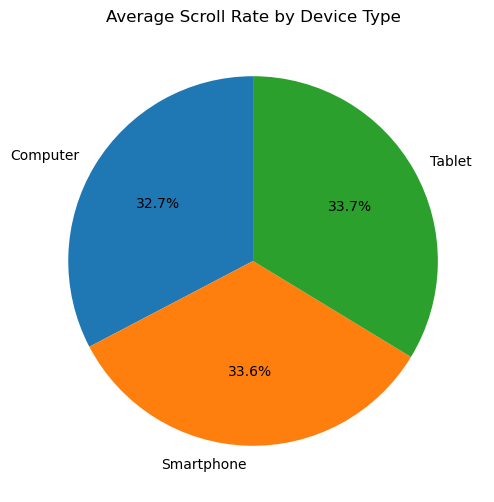

In [21]:
# Plot pie chart for avg scroll rate by device type
plt.figure(figsize=(10,6))
device_avg_scroll_rate.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Average Scroll Rate by Device Type')
plt.ylabel('')
plt.show()

In [22]:
# Get the average engagement level based off device type
device_engagement_lvl = cleaned_dataset_df.groupby('Device Type')['Engagement'].mean().round(1)
device_engagement_lvl

Device Type
Computer      5421.7
Smartphone    4903.0
Tablet        4993.8
Name: Engagement, dtype: float64

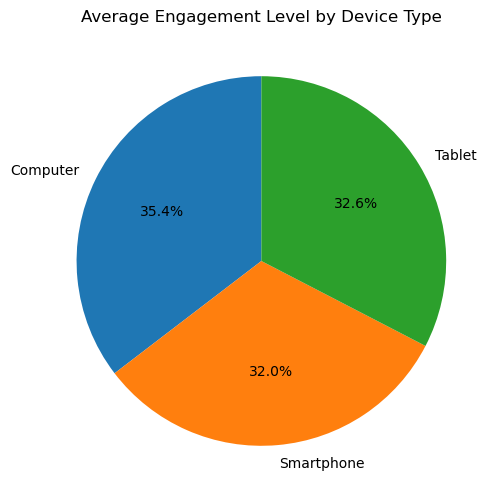

In [23]:
# Generate pie chart for average device engagement level
plt.figure(figsize=(10,6))
device_engagement_lvl.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Average Engagement Level by Device Type')
plt.ylabel('')
plt.show()

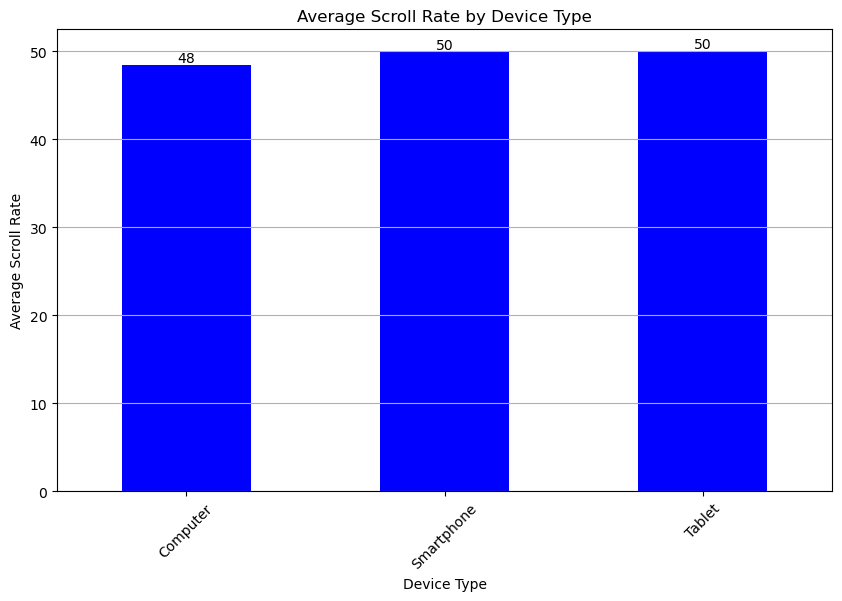

In [24]:
# Generate bar chart for average scroll rate by device type
plt.figure(figsize=(10,6))
ax = device_avg_scroll_rate.plot(kind='bar', color='blue', stacked=True)
plt.title("Average Scroll Rate by Device Type")
plt.xlabel("Device Type")
plt.ylabel("Average Scroll Rate")
plt.xticks(rotation=45)
plt.grid(axis='y')

# Add values on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='%.0f')
    
plt.show()

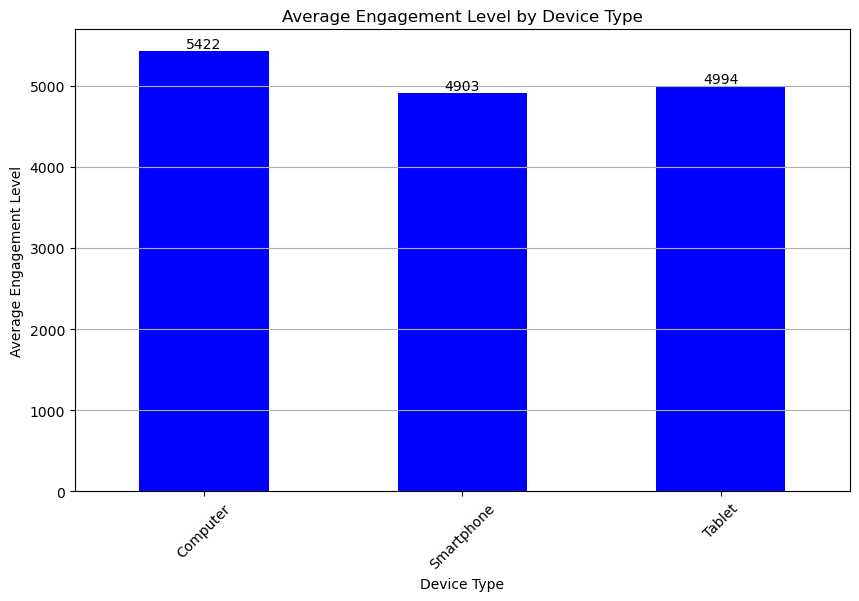

In [25]:
# Generate bar chart for average engagement level by device type
plt.figure(figsize=(10,6))
ax = device_engagement_lvl.plot(kind='bar', stacked=True, color='blue')
plt.title("Average Engagement Level by Device Type")
plt.xlabel("Device Type")
plt.ylabel("Average Engagement Level")
plt.xticks(rotation=45)
plt.grid(axis='y')

# Add values on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='%.0f')
    
plt.show()

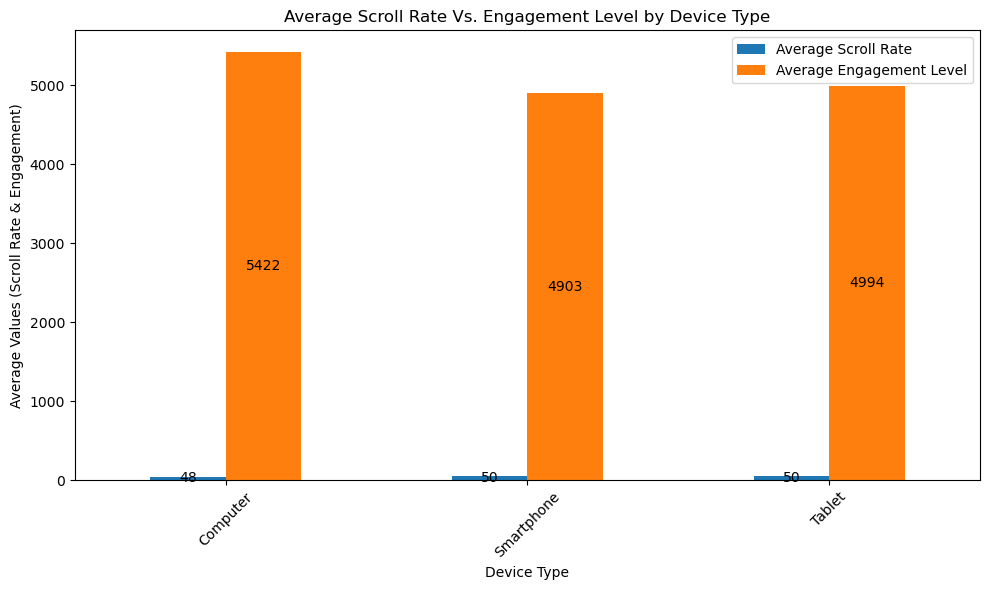

In [26]:
# Generate grouped bar chart for average scroll rate vs. average engagement level by device type

# Create a new dataframe with the averages
avg_df = pd.DataFrame({'Average Scroll Rate': device_avg_scroll_rate,
                       'Average Engagement Level': device_engagement_lvl
                       })
bar_width = 0.35

# Generate chart
ax = avg_df.plot(kind='bar', stacked=False, figsize=(10,6))
plt.title('Average Scroll Rate Vs. Engagement Level by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Average Values (Scroll Rate & Engagement)')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()

# Add values on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.0f')
    
plt.show()


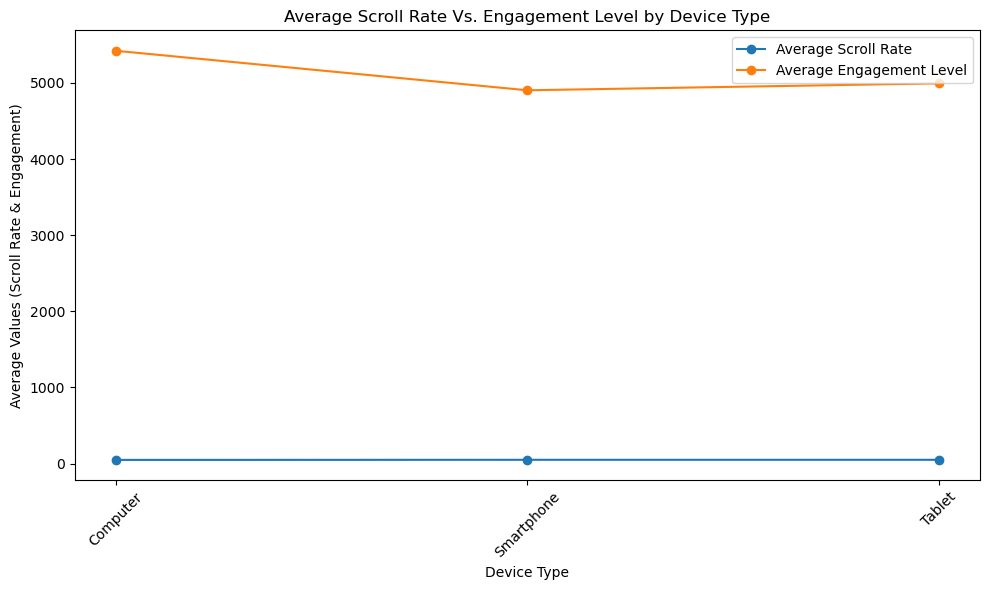

In [ ]:
# Generate line chart for average scroll rate vs. average engagement level by device type
avg_df = pd.DataFrame({'Device Type': device_avg_scroll_rate.index,
                        'Average Scroll Rate': device_avg_scroll_rate,
                       'Average Engagement Level': device_engagement_lvl
                       })

avg_df.set_index('Device Type', inplace=True)

plt.figure(figsize=(10,6))
plt.plot(avg_df.index, avg_df['Average Scroll Rate'], marker='o', label='Average Scroll Rate')
plt.plot(avg_df.index, avg_df['Average Engagement Level'], marker='o', label='Average Engagement Level')
plt.title('Average Scroll Rate Vs. Engagement Level by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Average Values (Scroll Rate & Engagement)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
# Calculate the correlation coefficient
correlation_coeff = stats.pearsonr(cleaned_dataset_df['Scroll Rate'], cleaned_dataset_df['Engagement'])

In [29]:
# Perform linear regression
slope, intercept, r_value, p_value, stderr = stats.linregress(cleaned_dataset_df['Scroll Rate'], cleaned_dataset_df['Engagement'])

# Fit ilnear regression
regression_equation = slope * cleaned_dataset_df['Scroll Rate'] + intercept

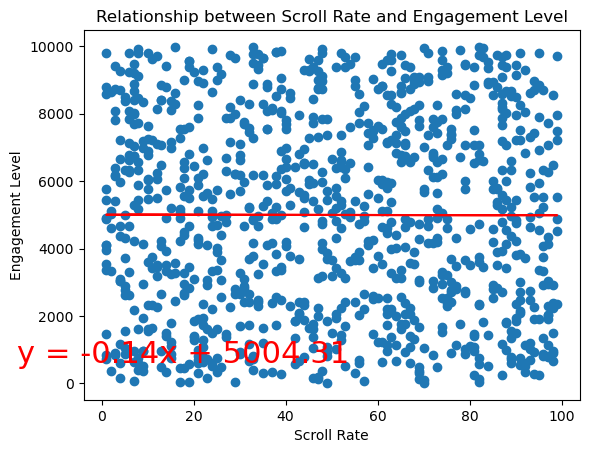

Correlation Coefficient: PearsonRResult(statistic=-0.0014412806711375228, pvalue=0.9636925819254766)


In [30]:
# Plot the data
plt.scatter(cleaned_dataset_df['Scroll Rate'], cleaned_dataset_df['Engagement'], label='Data Points')
plt.plot(cleaned_dataset_df['Scroll Rate'], regression_equation, color='red', label='Regression Line')
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, (0.2, 0.1), fontsize=22, color='red', xycoords='axes fraction', ha='center')
plt.xlabel('Scroll Rate')
plt.ylabel('Engagement Level')
plt.title('Relationship between Scroll Rate and Engagement Level')
plt.show()
print(f"Correlation Coefficient: {correlation_coeff}")

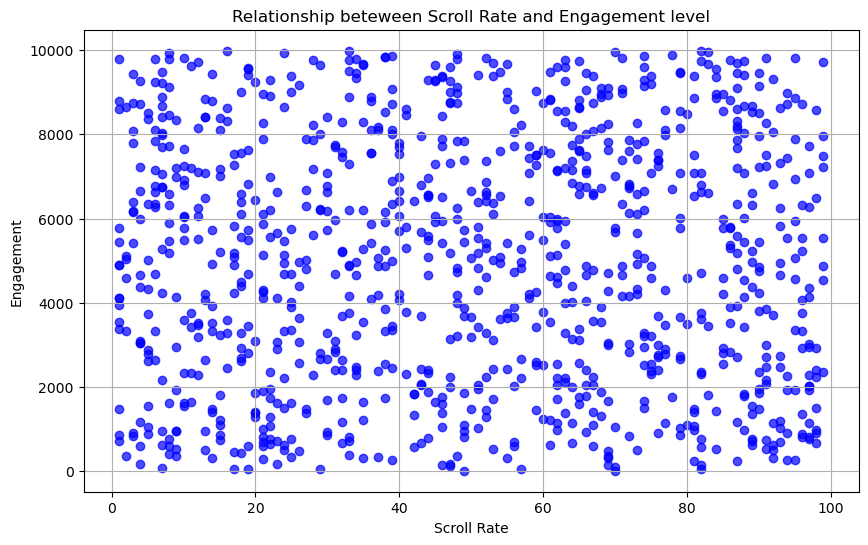

In [31]:
# Generate scatter plot to show the relationship between scroll rate and engagement level
plt.figure(figsize=(10,6))
plt.scatter(cleaned_dataset_df['Scroll Rate'], cleaned_dataset_df['Engagement'], color="blue", alpha=0.7)
plt.title("Relationship beteween Scroll Rate and Engagement level")
plt.xlabel("Scroll Rate")
plt.ylabel("Engagement")
plt.grid(True)
plt.show()

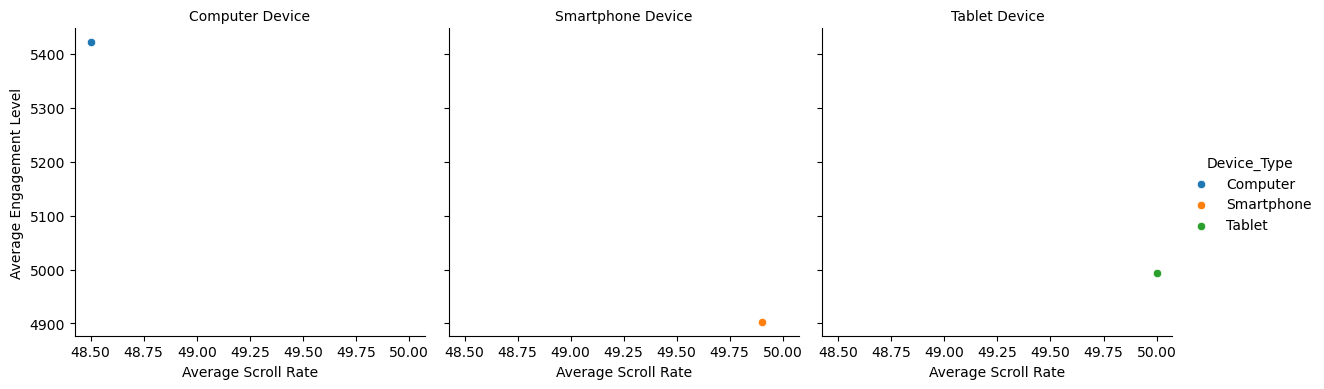

In [41]:
avg_df2= pd.DataFrame({
    'Device_Type': device_avg_scroll_rate.index,
    'Avg_Scroll_Rate': device_avg_scroll_rate,
    'Avg_Engagement_Level': device_engagement_lvl
})
facet_scatter = sns.FacetGrid(avg_df2, col='Device_Type', hue='Device_Type', height=4, aspect=1)
facet_scatter.map(sns.scatterplot, 'Avg_Scroll_Rate', 'Avg_Engagement_Level')
facet_scatter.add_legend()

facet_scatter.set_axis_labels('Average Scroll Rate', 'Average Engagement Level')
facet_scatter.set_titles(col_template='{col_name} Device')
plt.show()

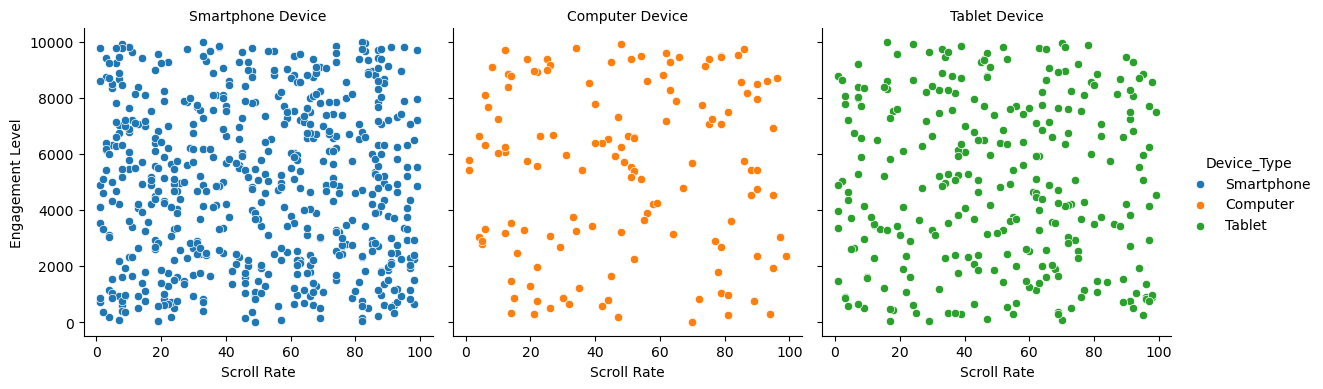

In [38]:
new_df= pd.DataFrame({
    'Device_Type': cleaned_dataset_df['Device Type'],
    'Scroll_Rate': cleaned_dataset_df['Scroll Rate'],
    'Engagement_Level': cleaned_dataset_df['Engagement']
})
facet_scatter = sns.FacetGrid(new_df, col='Device_Type', hue='Device_Type', height=4, aspect=1)
facet_scatter.map(sns.scatterplot, 'Scroll_Rate', 'Engagement_Level')
facet_scatter.add_legend()

facet_scatter.set_axis_labels('Scroll Rate', 'Engagement Level')
facet_scatter.set_titles(col_template='{col_name} Device')
plt.show()